In [1]:
%matplotlib inline

import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('./ks-projects-201801.csv', encoding='utf-8')
display(df.head())
display(df.shape)
# check null values
display(df.isnull().sum())
display(df.describe())
display(df.dtypes)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


(378661, 15)

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [3]:
# remove usd pledged and usd_pledged_real column
df = df.drop(['ID', 'name', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real'], axis=1)

In [4]:
df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d %H:%M:%S')
df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
df['period'] = df['deadline'] - df['launched']
df[['deadline', 'launched', 'period']] = df[['deadline', 'launched', 'period']].astype(np.int64)

In [5]:
df.head()

,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real,period
0,Poetry,Publishing,GBP,1444348800000000000,1000.0,1439295148000000000,failed,GB,1533.95,5053652000000000
1,Narrative Film,Film & Video,USD,1509494400000000000,30000.0,1504327437000000000,failed,US,30000.00,5166963000000000
2,Narrative Film,Film & Video,USD,1361836800000000000,45000.0,1357950050000000000,failed,US,45000.00,3886750000000000
3,Music,Music,USD,1334534400000000000,5000.0,1331954651000000000,failed,US,5000.00,2579749000000000
4,Film & Video,Film & Video,USD,1440806400000000000,19500.0,1435998903000000000,canceled,US,19500.00,4807497000000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe65862e208>,
      dtype=object)

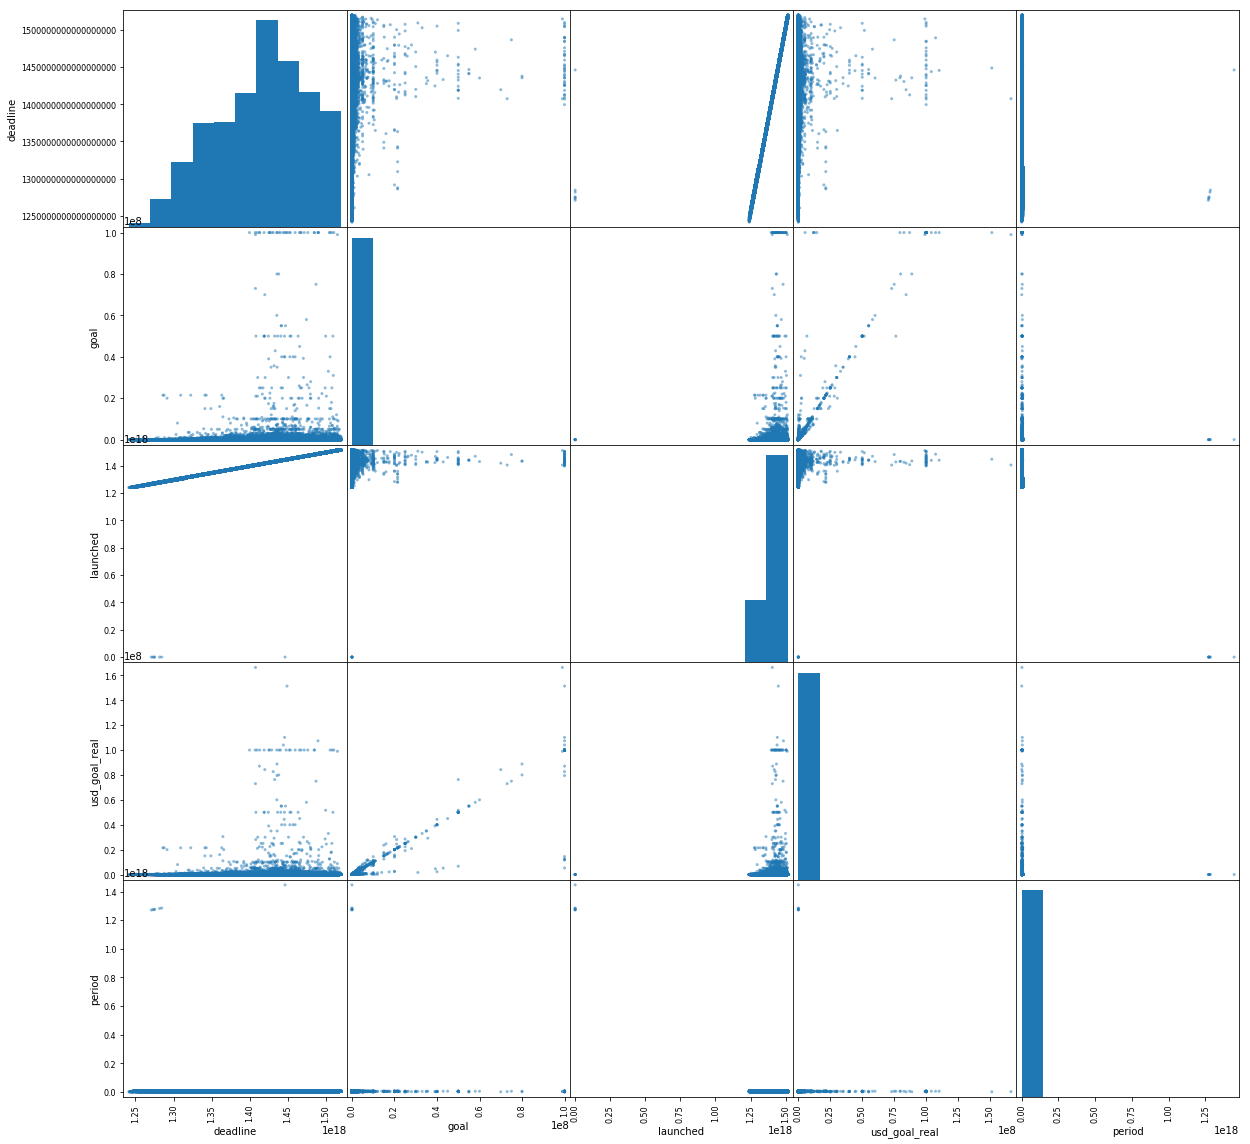

In [6]:
### run slow!!! ###
pd.plotting.scatter_matrix(df, figsize=(20, 20))

In [7]:
X = df.drop(['state'], axis=1)

In [8]:
y = df['state'] == 'successful'

In [9]:
X.head()

,category,main_category,currency,deadline,goal,launched,country,usd_goal_real,period
0,Poetry,Publishing,GBP,1444348800000000000,1000.0,1439295148000000000,GB,1533.95,5053652000000000
1,Narrative Film,Film & Video,USD,1509494400000000000,30000.0,1504327437000000000,US,30000.00,5166963000000000
2,Narrative Film,Film & Video,USD,1361836800000000000,45000.0,1357950050000000000,US,45000.00,3886750000000000
3,Music,Music,USD,1334534400000000000,5000.0,1331954651000000000,US,5000.00,2579749000000000
4,Film & Video,Film & Video,USD,1440806400000000000,19500.0,1435998903000000000,US,19500.00,4807497000000000


In [10]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: state, dtype: bool

## カテゴリ変数を取り出す

In [11]:
categorical_colmns = np.array(['category', 'main_category', 'currency', 'country'])
data_columns = np.array(['deadline', 'goal', 'launched', 'usd_goal_real', 'period'])

In [12]:
categorical_colmns

array(['category', 'main_category', 'currency', 'country'], dtype='<U13')

In [13]:
data_columns

array(['deadline', 'goal', 'launched', 'usd_goal_real', 'period'],
      dtype='<U13')

In [14]:
# convert categories to numbers
X_dummy = pd.get_dummies(X, columns=categorical_colmns)

In [15]:
X_dummy.head()

,deadline,goal,launched,usd_goal_real,period,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1444348800000000000,1000.0,1439295148000000000,1533.95,5053652000000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1509494400000000000,30000.0,1504327437000000000,30000.00,5166963000000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1361836800000000000,45000.0,1357950050000000000,45000.00,3886750000000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1334534400000000000,5000.0,1331954651000000000,5000.00,2579749000000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1440806400000000000,19500.0,1435998903000000000,19500.00,4807497000000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
X_dummy = X_dummy.drop(columns=data_columns)

In [17]:
X_dummy.head()

,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
categorized_columns = X_dummy.columns.values

## 連続値を標準化する

In [19]:
X_std = X.drop(categorical_colmns, axis=1)
display(X_std.head())
std = StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X_std), columns=data_columns)

,deadline,goal,launched,usd_goal_real,period
0,1444348800000000000,1000.0,1439295148000000000,1533.95,5053652000000000
1,1509494400000000000,30000.0,1504327437000000000,30000.00,5166963000000000
2,1361836800000000000,45000.0,1357950050000000000,45000.00,3886750000000000
3,1334534400000000000,5000.0,1331954651000000000,5000.00,2579749000000000
4,1440806400000000000,19500.0,1435998903000000000,19500.00,4807497000000000


In [20]:
X_std.head()

,deadline,goal,launched,usd_goal_real,period
0,0.487259,-0.040630,0.448672,-0.038094,0.372853
1,1.563616,-0.016124,1.514831,-0.013404,0.392750
2,-0.876032,-0.003448,-0.884924,-0.000394,0.167950
3,-1.327131,-0.037250,-1.311100,-0.035088,-0.061554
4,0.428730,-0.024997,0.394633,-0.022511,0.329629


In [21]:
data_columns

array(['deadline', 'goal', 'launched', 'usd_goal_real', 'period'],
      dtype='<U13')

In [22]:
categorized_columns

array(['category_3D Printing', 'category_Academic',
       'category_Accessories', 'category_Action', 'category_Animals',
       'category_Animation', 'category_Anthologies', 'category_Apparel',
       'category_Apps', 'category_Architecture', 'category_Art',
       'category_Art Books', 'category_Audio', 'category_Bacon',
       'category_Blues', 'category_Calendars',
       'category_Camera Equipment', 'category_Candles',
       'category_Ceramics', "category_Children's Books",
       'category_Childrenswear', 'category_Chiptune',
       'category_Civic Design', 'category_Classical Music',
       'category_Comedy', 'category_Comic Books', 'category_Comics',
       'category_Community Gardens', 'category_Conceptual Art',
       'category_Cookbooks', 'category_Country & Folk',
       'category_Couture', 'category_Crafts', 'category_Crochet',
       'category_DIY', 'category_DIY Electronics', 'category_Dance',
       'category_Design', 'category_Digital Art', 'category_Documentary',
   

In [23]:
X_data = pd.DataFrame(np.concatenate([X_std, X_dummy], axis=1), columns=np.hstack([data_columns, categorized_columns]))

In [24]:
X_data.head()

,deadline,goal,launched,usd_goal_real,period,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.487259,-0.040630,0.448672,-0.038094,0.372853,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.563616,-0.016124,1.514831,-0.013404,0.392750,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.876032,-0.003448,-0.884924,-0.000394,0.167950,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.327131,-0.037250,-1.311100,-0.035088,-0.061554,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.428730,-0.024997,0.394633,-0.022511,0.329629,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.1)

In [26]:
pipeline = Pipeline([('reduct', None),
                     ('est', None)])

print(X_train.shape)
print(y_train.shape)

(340794, 216)
(340794,)


In [27]:
param_grid = [
    {
        'reduct': [PCA()],
        'est': [SGDClassifier(loss='log')],
        'est__penalty': ['l1', 'l2'],
        'est__alpha': [0.01, 0.001, 0.0001],
        'reduct__n_components': [30, 50, 80]
    },
    {
        'reduct': [PCA()],
        'est': [RandomForestClassifier(n_estimators=100)],
        'est__max_features': [1, 'auto', None],
        'reduct__n_components': [30, 50, 80]
    },
    {
        'reduct': [PCA()],
        'est': [GradientBoostingClassifier(n_estimators=100)],
        'est__max_features': [1, 'auto', None],
        'reduct__n_components': [30, 50, 80]
    }
]

In [28]:
gs = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='roc_auc',
                  cv=3)

In [29]:
gs.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__reduct', 'estimator__est', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [30]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('reduct', None), ('est', None)],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'est': [SGDClassifier(alpha=0.0001, average=False,
                                                class_weight=None,
                                                early_stopping=False,
                                                epsilon=0.1, eta0=0.0,
                                                fit_intercept=True,
                                                l1_ratio=0.15,
                                                learning_rate='optimal',
                                                loss='log', max_i...
                                                             subsample=1.0,
                                                             tol=0.0001,
                                     

In [31]:
gs.best_params_

{'est': GradientBoostingClassifier(criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='auto',
                            random_state=None, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 'est__max_features': 'auto',
 'reduct': PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 'reduct__n_components': 80}

In [32]:
gs.best_score_

0.715222768151542

In [33]:
pd.DataFrame(gs.cv_results_).sort_values(by=['rank_test_score'], ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est,param_est__alpha,param_est__penalty,param_reduct,param_reduct__n_components,param_est__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
32,250.890775,6.715365,0.336634,0.028242,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,NaN,"PCA(copy=True, iterated_power='auto', n_compon...",80,auto,{'est': ([DecisionTreeRegressor(criterion='fri...,0.709052,0.718409,0.718207,0.715223,0.004364,1
35,262.583072,1.185136,0.328682,0.019327,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,NaN,"PCA(copy=True, iterated_power='auto', n_compon...",80,None,{'est': ([DecisionTreeRegressor(criterion='fri...,0.708964,0.717723,0.717548,0.714745,0.004088,2
34,155.748711,7.351150,0.259510,0.006886,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,NaN,"PCA(copy=True, iterated_power='auto', n_compon...",50,None,{'est': ([DecisionTreeRegressor(criterion='fri...,0.706431,0.715744,0.716386,0.712854,0.004549,3
31,156.652050,0.703402,0.277531,0.016198,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,NaN,"PCA(copy=True, iterated_power='auto', n_compon...",50,auto,{'est': ([DecisionTreeRegressor(criterion='fri...,0.706640,0.714656,0.717007,0.712768,0.004438,4
14,5.775154,0.165826,0.124981,0.003079,"SGDClassifier(alpha=0.0001, average=False, cla...",0.0001,l1,"PCA(copy=True, iterated_power='auto', n_compon...",80,NaN,"{'est': SGDClassifier(alpha=0.0001, average=Fa...",0.710169,0.714330,0.711749,0.712083,0.001715,5
33,91.182326,0.557992,0.216729,0.000400,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,NaN,"PCA(copy=True, iterated_power='auto', n_compon...",30,None,{'est': ([DecisionTreeRegressor(criterion='fri...,0.699741,0.708176,0.711566,0.706494,0.004972,6
17,4.880166,0.005664,0.122944,0.001670,"SGDClassifier(alpha=0.0001, average=False, cla...",0.0001,l2,"PCA(copy=True, iterated_power='auto', n_compon...",80,NaN,"{'est': SGDClassifier(alpha=0.0001, average=Fa...",0.706454,0.707538,0.703225,0.705739,0.001832,7
30,102.944043,2.193749,0.236144,0.015040,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,NaN,"PCA(copy=True, iterated_power='auto', n_compon...",30,auto,{'est': ([DecisionTreeRegressor(criterion='fri...,0.697269,0.708618,0.707851,0.704579,0.005179,8
13,3.567305,0.029271,0.112283,0.001126,"SGDClassifier(alpha=0.0001, average=False, cla...",0.0001,l1,"PCA(copy=True, iterated_power='auto', n_compon...",50,NaN,"{'est': SGDClassifier(alpha=0.0001, average=Fa...",0.701251,0.704615,0.707193,0.704353,0.002433,9
16,3.273244,0.024309,0.111592,0.002227,"SGDClassifier(alpha=0.0001, average=False, cla...",0.0001,l2,"PCA(copy=True, iterated_power='auto', n_compon...",50,NaN,"{'est': SGDClassifier(alpha=0.0001, average=Fa...",0.699792,0.702161,0.703616,0.701856,0.001576,10
